In [1]:
import pandas as pd
import numpy as np

In [2]:
import pymongo

DB_CONN_STRING = "mongodb://localhost:27017/"
DB_NAME = "poland-covid-vaccine-tweets"
COLLECTION_NAME = "tweets"

In [3]:
import sys
sys.path.append('/home/michal/dev/agh/eksploracja/project/poland-covid-vaccine/venv/lib/python3.8/site-packages')

In [4]:
mongo_client = pymongo.MongoClient(DB_CONN_STRING)
database_name = mongo_client[DB_NAME]
data_collection = database_name[COLLECTION_NAME]

In [5]:
tweets = [tweet for tweet in data_collection.find({})]

In [6]:
USERS_COLLECTION = "users"
users_collection = database_name[USERS_COLLECTION]
users = [user for user in users_collection.find({})]

In [7]:
users_df = pd.DataFrame(users)

In [8]:
df = pd.DataFrame(tweets)
df["sentiment"] = pd.to_numeric(df["sentiment"])
df.date = pd.to_datetime(df.date)
df

,_id,url,date,content,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceUrl,sourceLabel,retweetedTweet,quotedTweet,mentionedUsers,covid_topic,sentiment,was_quotedTweet
0,1366121799935746049,https://twitter.com/tomaszbryjow/status/136612...,2021-02-28 20:23:13+00:00,AstraZeneca dziesiątkuje prywatne przedszkola....,1257244746256441344,14,43,121,1,1366121799935746049,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,None,True,0.5,NaN
1,1366108573688856579,https://twitter.com/sta_____pawel/status/13661...,2021-02-28 19:30:39+00:00,@szejnfeld Dlaczego ta szczepionka wywołuje ta...,4107565035,0,0,1,0,1366046249653325824,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,[535452316],True,0.0,NaN
2,1366115738101157895,https://twitter.com/Lev_Lachim/status/13661157...,2021-02-28 19:59:07+00:00,@napalonywikary Dlaczego AstraZeneca drastyczn...,1255502249759059968,1,0,0,0,1366102520146329600,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,[479373693],True,-1.0,NaN
3,1366156724302921737,https://twitter.com/alhusajn/status/1366156724...,2021-02-28 22:41:59+00:00,@AnnaZalewskaMEP @EU_Commission @AstraZeneca d...,2756391432,0,0,0,0,1364519202837716996,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,"[3354883925, 157981564, 62465691]",True,-1.0,NaN
4,1366108974538489863,https://twitter.com/zagadkax/status/1366108974...,2021-02-28 19:32:15+00:00,@michaldworczyk @WasikMaciej Dlaczego grupę se...,887075938344861696,1,0,2,0,1366107056583962625,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,"[2776583390, 710949102733885440]",True,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666498,1389309572041613312,https://twitter.com/J_Janumir/status/138930957...,2021-05-03 20:03:08+00:00,@GiertychRoman Palikot: \n1 Kaczyński zaszczep...,1169956956,0,0,0,1,1389301312785981442,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,[2919694493],NaN,0.0,True
666499,1388451951231242241,https://twitter.com/MikeWolf9999/status/138845...,2021-05-01 11:15:16+00:00,Konto wspierające Hołownie/PL2050 i dodatkowo ...,1024005327665213440,2,5,15,1,1388451951231242241,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,NaN,0.5,True
666500,1389467010615103492,https://twitter.com/MaaPera4/status/1389467010...,2021-05-04 06:28:45+00:00,Gdyby ktoś dał Wam napój do wypicia i powiedzi...,1281717847912321025,80,59,321,6,1389467010615103492,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,None,NaN,-0.5,True
666501,1389497641071960064,https://twitter.com/PiotrWitczak7/status/13894...,2021-05-04 08:30:27+00:00,Według danych WHO na COVID-19 przez rok trwani...,1331869827473027072,3,21,81,1,1389495137982722048,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,None,NaN,-1.0,True


In [9]:
df_with_covid_topic = df[df['covid_topic'] == True]
df_with_covid_topic

,_id,url,date,content,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,sourceUrl,sourceLabel,retweetedTweet,quotedTweet,mentionedUsers,covid_topic,sentiment,was_quotedTweet
0,1366121799935746049,https://twitter.com/tomaszbryjow/status/136612...,2021-02-28 20:23:13+00:00,AstraZeneca dziesiątkuje prywatne przedszkola....,1257244746256441344,14,43,121,1,1366121799935746049,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,None,True,0.5,NaN
1,1366108573688856579,https://twitter.com/sta_____pawel/status/13661...,2021-02-28 19:30:39+00:00,@szejnfeld Dlaczego ta szczepionka wywołuje ta...,4107565035,0,0,1,0,1366046249653325824,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,[535452316],True,0.0,NaN
2,1366115738101157895,https://twitter.com/Lev_Lachim/status/13661157...,2021-02-28 19:59:07+00:00,@napalonywikary Dlaczego AstraZeneca drastyczn...,1255502249759059968,1,0,0,0,1366102520146329600,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,[479373693],True,-1.0,NaN
3,1366156724302921737,https://twitter.com/alhusajn/status/1366156724...,2021-02-28 22:41:59+00:00,@AnnaZalewskaMEP @EU_Commission @AstraZeneca d...,2756391432,0,0,0,0,1364519202837716996,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,"[3354883925, 157981564, 62465691]",True,-1.0,NaN
4,1366108974538489863,https://twitter.com/zagadkax/status/1366108974...,2021-02-28 19:32:15+00:00,@michaldworczyk @WasikMaciej Dlaczego grupę se...,887075938344861696,1,0,2,0,1366107056583962625,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,"[2776583390, 710949102733885440]",True,0.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644495,1388359743798980609,https://twitter.com/Erato001/status/1388359743...,2021-05-01 05:08:52+00:00,@falstafiku @mtejchman Ospa to co innego. Ma s...,884875476380127232,3,0,4,0,1388132863556587526,pl,http://twitter.com/download/android,Twitter for Android,None,NaN,"[3307901823, 331783859]",True,0.0,NaN
644496,1388330078308913154,https://twitter.com/PBeatap/status/13883300783...,2021-05-01 03:10:59+00:00,Fabryka szczepionek Pfizer ma problemy z pleśn...,1244303888850857985,0,4,5,0,1388330078308913154,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,None,True,0.5,NaN
644497,1388323474524016640,https://twitter.com/Mateusz_Luxury/status/1388...,2021-05-01 02:44:44+00:00,"„Moje ciało moja sprawa”...a chyba, ze chodzi ...",1027808412372008961,0,0,0,0,1388323474524016640,pl,http://twitter.com/download/iphone,Twitter for iPhone,None,NaN,None,True,-0.5,NaN
644498,1388307690523402248,https://twitter.com/PaniDubito/status/13883076...,2021-05-01 01:42:01+00:00,@EwaRuda7 @skorzynski Bardzo chętnie sama zapł...,735808205775900672,0,0,4,0,1388064332433526784,pl,https://mobile.twitter.com,Twitter Web App,None,NaN,"[1258423811860463617, 44715874]",True,1.0,NaN


In [10]:
minimal = df_with_covid_topic.loc[df_with_covid_topic.groupby('conversationId')['date'].idxmin()]
minimal = minimal.loc[minimal['_id'] == minimal['conversationId']][['_id', 'conversationId', 'sentiment', 'date']]
minimal = minimal.rename(columns={'date': 'minimalDate', '_id': 'minimalId'})

In [11]:
minimal

,minimalId,conversationId,sentiment,minimalDate
14072,1356032073555914753,1356032073555914753,0.0,2021-02-01 00:10:14+00:00
3703,1356039602533003266,1356039602533003266,0.0,2021-02-01 00:40:09+00:00
41067,1356040018683453442,1356040018683453442,0.0,2021-02-01 00:41:49+00:00
14071,1356040505973501959,1356040505973501959,-0.5,2021-02-01 00:43:45+00:00
23451,1356051673488228352,1356051673488228352,0.0,2021-02-01 01:28:07+00:00
...,...,...,...,...
581522,1396069832710311945,1396069832710311945,1.5,2021-05-22 11:46:00+00:00
581519,1396071073502859273,1396071073502859273,-0.5,2021-05-22 11:50:56+00:00
638516,1396071491964375042,1396071491964375042,0.5,2021-05-22 11:52:36+00:00
581530,1396071643181690881,1396071643181690881,-1.0,2021-05-22 11:53:12+00:00


In [12]:
maximal = df_with_covid_topic.loc[df_with_covid_topic.groupby('conversationId')['date'].idxmax()]
maximal = maximal[['conversationId', 'date']].rename(columns={'date': 'maximalDate'})

In [13]:
maximal

,conversationId,maximalDate
163451,11788902058,2021-04-05 06:30:34+00:00
631865,779780151747944449,2021-05-12 04:17:13+00:00
5038,865259741118967810,2021-02-10 22:47:52+00:00
151178,947834646879813632,2021-04-18 15:32:03+00:00
597129,948666715323461633,2021-05-02 20:17:11+00:00
...,...,...
559479,1396070454146838531,2021-05-22 11:58:36+00:00
581519,1396071073502859273,2021-05-22 11:50:56+00:00
638516,1396071491964375042,2021-05-22 11:52:36+00:00
581530,1396071643181690881,2021-05-22 11:53:12+00:00


In [14]:
merged = pd.merge(minimal, maximal, on='conversationId')

In [15]:
merged['dateDiff'] = merged['maximalDate'] - merged['minimalDate']

In [16]:
merged.sort_values(by=['dateDiff'], ascending=False)

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff
474,1356252057766940672,1356252057766940672,2.0,2021-02-01 14:44:23+00:00,2021-05-15 20:36:46+00:00,103 days 05:52:23
1523,1356642659771830276,1356642659771830276,0.5,2021-02-02 16:36:29+00:00,2021-04-20 14:54:42+00:00,76 days 22:18:13
1593,1356659658644217858,1356659658644217858,2.0,2021-02-02 17:44:02+00:00,2021-04-20 10:05:21+00:00,76 days 16:21:19
1948,1356878386459783168,1356878386459783168,1.0,2021-02-03 08:13:11+00:00,2021-04-18 22:34:03+00:00,74 days 14:20:52
18952,1367411992479346689,1367411992479346689,-1.5,2021-03-04 09:49:58+00:00,2021-05-14 11:55:15+00:00,71 days 02:05:17
...,...,...,...,...,...,...
39299,1376058720451489796,1376058720451489796,-0.5,2021-03-28 06:28:59+00:00,2021-03-28 06:28:59+00:00,0 days 00:00:00
39298,1376058702801801218,1376058702801801218,-0.5,2021-03-28 06:28:55+00:00,2021-03-28 06:28:55+00:00,0 days 00:00:00
39297,1376056613874851840,1376056613874851840,0.0,2021-03-28 06:20:37+00:00,2021-03-28 06:20:37+00:00,0 days 00:00:00
39296,1376056203910987776,1376056203910987776,0.5,2021-03-28 06:18:59+00:00,2021-03-28 06:18:59+00:00,0 days 00:00:00


In [17]:
bins = [
    pd.Timedelta("nan"),
    pd.Timedelta(minutes = 1),
    pd.Timedelta(minutes = 60),
    pd.Timedelta(days = 1),
    pd.Timedelta(days = 2),
    pd.Timedelta(days = 3),
    pd.Timedelta(days = 7),
    pd.Timedelta(days = 14),
    pd.Timedelta(days = 30),
    pd.Timedelta(weeks = 2000)
]
labels = ['0-1 min', '1-60 min', '60 min-1 day', '1-2 days', '2-3 days', '3-7 days', '7-14 days', 
          '14-30 days', '30+ days']

In [18]:
merged['bins'] = pd.cut(merged['dateDiff'], bins, labels = labels)

<AxesSubplot:title={'center':'Zywotność tweetów'}, xlabel='bins'>

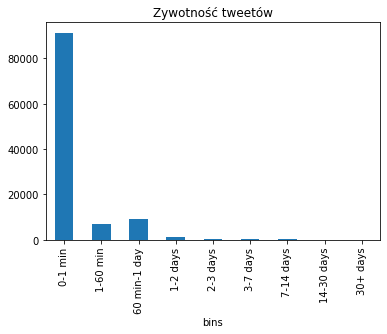

In [19]:
all_grouped = merged.groupby('bins').count()
all_grouped.reset_index().plot.bar(x='bins', y='minimalId', title = "Zywotność tweetów", legend = False)

<AxesSubplot:title={'center':'Zywotność tweetów z pozytywnym sentymentem (powyżej 0)'}, xlabel='bins'>

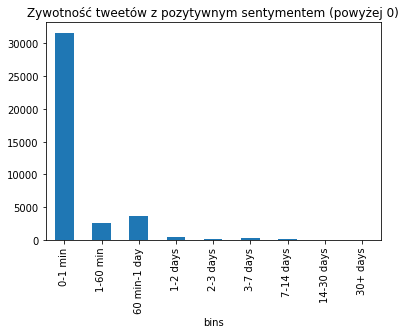

In [20]:
positive_grouped = merged[merged['sentiment'] > 0].groupby('bins').count()
positive_grouped.reset_index().plot.bar(x='bins', y='minimalId', title = "Zywotność tweetów z pozytywnym sentymentem (powyżej 0)", legend = False)

<AxesSubplot:title={'center':'Zywotność tweetów z negatywnym sentymentem (poniżej 0)'}, xlabel='bins'>

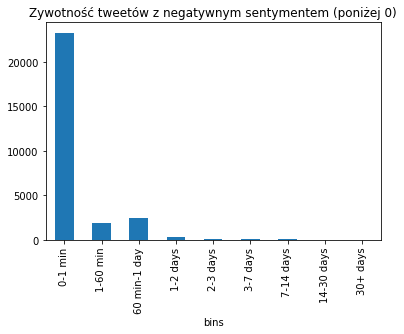

In [21]:
negative_grouped = merged[merged['sentiment'] < 0].groupby('bins').count()
negative_grouped.reset_index().plot.bar(x='bins', y='minimalId', title = "Zywotność tweetów z negatywnym sentymentem (poniżej 0)", legend = False)

<AxesSubplot:title={'center':'Zywotność tweetów z neutralnym sentymentem (równym 0)'}, xlabel='bins'>

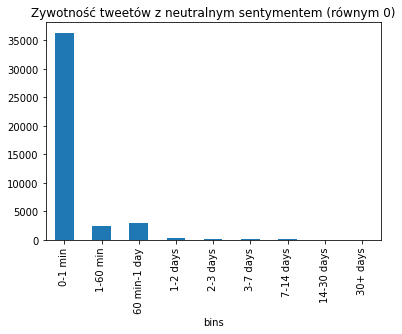

In [22]:
neutral_grouped =  merged[merged['sentiment'] == 0].groupby('bins').count()
neutral_grouped.reset_index().plot.bar(x='bins', y='minimalId', title = "Zywotność tweetów z neutralnym sentymentem (równym 0)", legend = False)

In [23]:
grouped = merged.groupby('bins').count()
grouped

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff
bins,,,,,,
0-1 min,91304,91304,91304,91304,91304,91304
1-60 min,6831,6831,6831,6831,6831,6831
60 min-1 day,8970,8970,8970,8970,8970,8970
1-2 days,1133,1133,1133,1133,1133,1133
2-3 days,368,368,368,368,368,368
3-7 days,439,439,439,439,439,439
7-14 days,131,131,131,131,131,131
14-30 days,50,50,50,50,50,50
30+ days,29,29,29,29,29,29


In [24]:
merged[(merged['sentiment'] >= -0.5) & (merged['sentiment'] <= 0.5)].sort_values("dateDiff", ascending=False)

,minimalId,conversationId,sentiment,minimalDate,maximalDate,dateDiff,bins
1523,1356642659771830276,1356642659771830276,0.5,2021-02-02 16:36:29+00:00,2021-04-20 14:54:42+00:00,76 days 22:18:13,30+ days
8202,1360634926790545412,1360634926790545412,0.0,2021-02-13 17:00:20+00:00,2021-04-18 19:25:41+00:00,64 days 02:25:21,30+ days
16175,1366044069311500289,1366044069311500289,0.5,2021-02-28 15:14:20+00:00,2021-04-29 10:37:10+00:00,59 days 19:22:50,30+ days
21989,1369303845726261258,1369303845726261258,-0.5,2021-03-09 15:07:31+00:00,2021-04-23 13:31:45+00:00,44 days 22:24:14,30+ days
20529,1368165193151307778,1368165193151307778,0.5,2021-03-06 11:42:55+00:00,2021-04-17 21:10:29+00:00,42 days 09:27:34,30+ days
...,...,...,...,...,...,...,...
39552,1376218284538888192,1376218284538888192,0.0,2021-03-28 17:03:02+00:00,2021-03-28 17:03:02+00:00,0 days 00:00:00,0-1 min
39555,1376224043637080068,1376224043637080068,0.0,2021-03-28 17:25:55+00:00,2021-03-28 17:25:55+00:00,0 days 00:00:00,0-1 min
39557,1376225166552924160,1376225166552924160,0.5,2021-03-28 17:30:23+00:00,2021-03-28 17:30:23+00:00,0 days 00:00:00,0-1 min
39559,1376226464421584901,1376226464421584901,0.0,2021-03-28 17:35:32+00:00,2021-03-28 17:35:32+00:00,0 days 00:00:00,0-1 min


<AxesSubplot:xlabel='bins'>

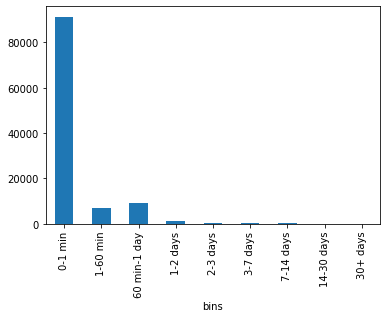

In [25]:
grouped.reset_index().plot.bar(x='bins', y='minimalId', legend = False)

In [26]:
merged["sentiment"] = pd.to_numeric(merged["sentiment"])

In [27]:
grouped_xd = merged.groupby('dateDiff').agg( {'sentiment':['mean','std']}).reset_index()
# grouped_xd.filter()

<AxesSubplot:title={'center':'Średni sentyment względem czasu życia tweeta'}, xlabel='bins'>

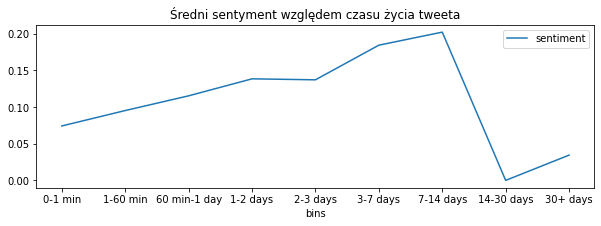

In [28]:
merged.groupby('bins').sentiment.mean().reset_index().plot(x='bins', y ='sentiment', figsize=(10,3), title='Średni sentyment względem czasu życia tweeta')

<AxesSubplot:>

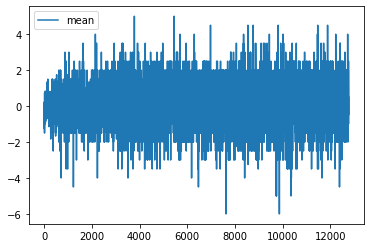

In [29]:
grouped_xd.loc[grouped_xd['dateDiff'] < pd.Timedelta(weeks = 1)]['sentiment'].plot(y='mean')

In [30]:
merged['sentimentHigh'] = merged['sentiment'] < 0

<AxesSubplot:xlabel='sentiment is high', ylabel='count'>

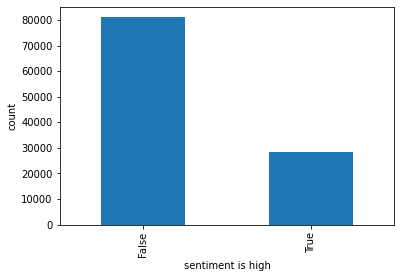

In [31]:
merged.groupby('sentimentHigh').count().reset_index().plot.bar(x='sentimentHigh', y='minimalId', xlabel='sentiment is high', ylabel = 'count', legend = False)

In [32]:
merged['secondsOfLife'] = merged['dateDiff'].dt.total_seconds()

In [33]:
grouped_by_sentiment = merged.groupby('sentiment').agg( {'secondsOfLife':['mean','std']})

<AxesSubplot:title={'center':'Średni czas życia w sekundach'}, xlabel='sentiment'>

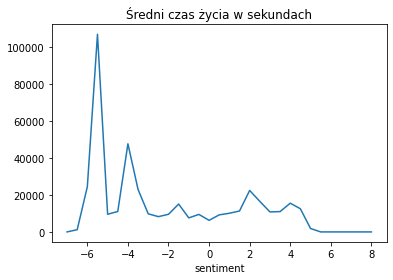

In [34]:
grouped_by_sentiment.secondsOfLife.plot(y = "mean", legend = False,title = "Średni czas życia w sekundach")

# Użytkownicy

## Najwięcej sentymentu

In [35]:
grouped_sentiment = df.groupby('user')['sentiment'].sum().reset_index()

In [36]:
grouped_sentiment.sort_values('sentiment').tail(10)

,user,sentiment
33716,864554093825675265,150.0
3324,180822352,157.5
42523,1067900151329669120,163.0
58484,1302918570867912706,169.5
47017,1156144667756519424,170.0
13413,1363264568,182.0
8381,562800078,182.5
5842,381383589,205.5
16292,2239021813,220.0
63059,1346846950080081920,4835.0


In [117]:
for row in grouped_sentiment.sort_values('sentiment', ascending=False).head(10).itertuples():
    user = row[1]
    sentiment = row[2]
    a = users_df[users_df['_id'] == np.int64(user)]['url']
    suma = grouped_count[grouped_count['user'] == np.int64(user)].values[0][1]
    print("Użytkownik: %s Sentyment: %d, Liczba tweetów: %d" % (a.values[0], sentiment, suma))

Użytkownik: https://twitter.com/szczepimysie Sentyment: 4835, Liczba tweetów: 10574
Użytkownik: https://twitter.com/PolskieRadio24 Sentyment: 220, Liczba tweetów: 677
Użytkownik: https://twitter.com/TVPParlament Sentyment: 205, Liczba tweetów: 405
Użytkownik: https://twitter.com/RadioZET_NEWS Sentyment: 182, Liczba tweetów: 453
Użytkownik: https://twitter.com/gfkot Sentyment: 182, Liczba tweetów: 1673
Użytkownik: https://twitter.com/GolubPsse Sentyment: 170, Liczba tweetów: 343
Użytkownik: https://twitter.com/Grzegorz_Red Sentyment: 169, Liczba tweetów: 644
Użytkownik: https://twitter.com/bfialek Sentyment: 163, Liczba tweetów: 309
Użytkownik: https://twitter.com/PR24_pl Sentyment: 157, Liczba tweetów: 525
Użytkownik: https://twitter.com/PolskieSluzby Sentyment: 150, Liczba tweetów: 443


## Najwięcej tweetów

In [82]:
grouped_count = df.groupby('user')['sentiment'].count().reset_index()

In [83]:
grouped_count

,user,sentiment
0,12588,1
1,23293,4
2,612373,1
3,798046,4
4,1126461,3
...,...,...
68174,1395345794207731716,1
68175,1395363502899007490,2
68176,1395459225229447174,1
68177,1395682959500488707,1


In [38]:
top_10_users_count = grouped_count.sort_values('sentiment', ascending = False).head(10)

In [39]:
top_10_users_count

,user,sentiment
63059,1346846950080081920,10574
26563,4703620853,3493
39633,994143956266029056,2614
5555,361366954,1679
46656,1148565141895753729,1674
13413,1363264568,1673
9496,754000483,1377
2888,145353492,1219
54633,1259545924814155776,1167
20281,2861519819,1114


In [54]:
for row in top_10_users_count.iterrows():
    user, sentiment_count = row[1]
    a = users_df[users_df['_id'] == np.int64(user)]['url']
    print("Użytkownik: %s Liczba tweetów: %d" % (a.values[0], sentiment_count))


Użytkownik: https://twitter.com/szczepimysie Liczba tweetów: 10574
Użytkownik: https://twitter.com/JacekJaworskiGd Liczba tweetów: 3493
Użytkownik: https://twitter.com/SamselMarcin Liczba tweetów: 2614
Użytkownik: https://twitter.com/TomaszLaszcz Liczba tweetów: 1679
Użytkownik: https://twitter.com/Dawid95001263 Liczba tweetów: 1674
Użytkownik: https://twitter.com/gfkot Liczba tweetów: 1673
Użytkownik: https://twitter.com/KiraCzarczynska Liczba tweetów: 1377
Użytkownik: https://twitter.com/arekmakarenko Liczba tweetów: 1219
Użytkownik: https://twitter.com/JarekMarek11 Liczba tweetów: 1167
Użytkownik: https://twitter.com/marek_zawal23 Liczba tweetów: 1114


# new covid cases

In [44]:
covid_cases = pd.read_csv('full_data.csv')
covid_cases_poland = covid_cases[covid_cases['location'] == 'Poland']
covid_cases_poland.date = pd.to_datetime(covid_cases_poland.date)
covid_cases_poland = covid_cases_poland[covid_cases_poland['date'] >= '2021-02-01']

c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='date'>

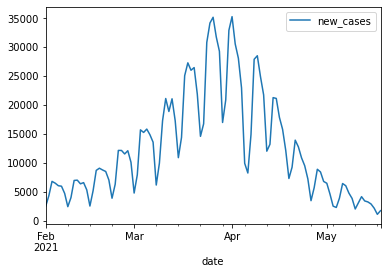

In [45]:
covid_cases_poland.plot(x = 'date',y='new_cases')

In [46]:
df_to_compae_cases = df[['date', 'sentiment']]
df_to_compae_cases.date = pd.to_datetime(df_to_compae_cases.date)
df_to_compae_cases.date = df_to_compae_cases.date.dt.date
df_to_compae_cases.date = pd.to_datetime(df_to_compae_cases.date)
df_to_compae_cases = df_to_compae_cases[df_to_compae_cases['date'] >= '2021-02-01']

c:\users\micha\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:>

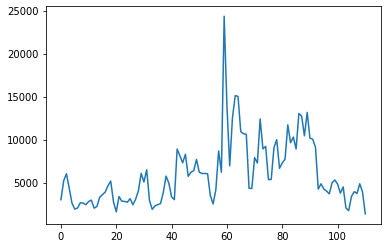

In [47]:
df_to_compae_cases.groupby('date').count().reset_index().sort_values('date').plot(y='sentiment', legend = False)

In [48]:
grouped_to_compare = df_to_compae_cases.groupby('date').size().reset_index(name='countsOfTweets')

In [49]:
grouped_to_compare

,date,countsOfTweets
0,2021-02-01,3018
1,2021-02-02,5226
2,2021-02-03,6038
3,2021-02-04,4358
4,2021-02-05,2617
...,...,...
106,2021-05-18,3957
107,2021-05-19,3733
108,2021-05-20,4870
109,2021-05-21,3916


In [50]:
covid_cases_poland

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
62482,2021-02-01,Poland,2504.0,42.0,1515889.0,37222.0,37770.0,1821.0,76975.0,3815.0
62483,2021-02-02,Poland,4326.0,254.0,1520215.0,37476.0,37493.0,1811.0,76411.0,3778.0
62484,2021-02-03,Poland,6801.0,421.0,1527016.0,37897.0,37504.0,1843.0,76269.0,3756.0
62485,2021-02-04,Poland,6495.0,447.0,1533511.0,38344.0,36846.0,1901.0,75756.0,3783.0
62486,2021-02-05,Poland,6053.0,368.0,1539564.0,38712.0,36754.0,1932.0,75116.0,3804.0
...,...,...,...,...,...,...,...,...,...,...
62584,2021-05-14,Poland,3252.0,290.0,2849014.0,71311.0,24589.0,1866.0,56872.0,3809.0
62585,2021-05-15,Poland,2897.0,298.0,2851911.0,71609.0,22715.0,1743.0,53294.0,3685.0
62586,2021-05-16,Poland,2168.0,55.0,2854079.0,71664.0,21027.0,1652.0,50846.0,3596.0
62587,2021-05-17,Poland,1111.0,11.0,2855190.0,71675.0,20107.0,1641.0,49434.0,3570.0


In [51]:
tweets_amd_cases = grouped_to_compare.merge(covid_cases_poland, on = 'date')

<AxesSubplot:xlabel='date'>

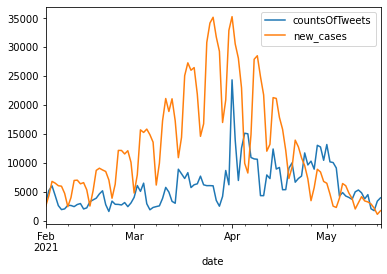

In [52]:
tweets_amd_cases.plot(x = 'date', y=['countsOfTweets', 'new_cases'])

<AxesSubplot:xlabel='date'>

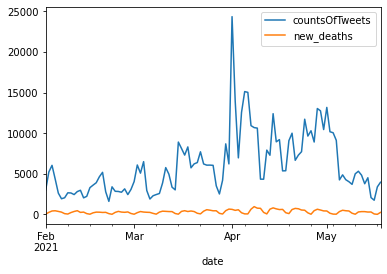

In [53]:
tweets_amd_cases.plot(x = 'date', y=['countsOfTweets', 'new_deaths'])